# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
path = "/Users/saideepbunny/Projects/Application_Ranking_System"

## Reading the data

In [3]:
# df1 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_skills.csv")
# df2 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_summary.csv")
df = pd.read_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_jd_resume_set1_1.csv")
df

,id,job_title,company,job_skills,job_summary,category,resume_text
0,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Complete Mismatch,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...
1,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Underwhelming,**Christina Padilla DVM**\n\n*Email: christina...
2,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Good Fit,**Andrew Kirby**\n*+44 00000 000000* *|* *andr...
3,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Overqualified,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....
4,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Complete Mismatch,**Randy Smith**\n*+1 (123) 456-7890* *|* *rand...
...,...,...,...,...,...,...,...
995,650758,Quality Control Inspector,Avelo Airlines,"Quality Control, Technical Operations, Regulat...","Job Type\nFull-time\nDescription\nOn April 28,...",Overqualified,# Todd Coleman\n\n*Phone*: (123) 456-7890 | *E...
996,702092,Quality Control Inspector,FactoryFix,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",Complete Mismatch,**CHRISTOPHER MOODY**\n\n*+1 (555) 555-5555* *...
997,702092,Quality Control Inspector,FactoryFix,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",Underwhelming,# Eric Zhang\n\n*Email*: eric.zhang@email.com ...
998,702092,Quality Control Inspector,FactoryFix,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",Good Fit,**SCOTT PATTERSON**\n*Phone*: (123) 456-7890 *...


In [4]:
df['id'].nunique()

250

In [5]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 1000
Number of columns in the dataset: 7


### Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   job_title    1000 non-null   object
 2   company      1000 non-null   object
 3   job_skills   1000 non-null   object
 4   job_summary  1000 non-null   object
 5   category     1000 non-null   object
 6   resume_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


### Null value report

In [7]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [8]:
null_value_report(df)

,column,Count,Percentage
0,id,0,0.0
1,job_title,0,0.0
2,company,0,0.0
3,job_skills,0,0.0
4,job_summary,0,0.0
5,category,0,0.0
6,resume_text,0,0.0


## Categorizing columns

In [9]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [10]:
# get_cardinality(df)

In [11]:
ignore_columns = ["id"]
numerical_columns = []

categorical_columns = ["category", "job_title", "company"]
text_columns = ["job_skills", "job_summary", "resume_text"]

In [12]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [13]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 0
Number of Categorical columns: 3
Number of Text columns: 3


## EDA

### Numerical columns

In [14]:
#There are no numerical fields

#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [16]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,category,0,0.0
1,job_title,0,0.0
2,company,0,0.0


#### Statistics

In [17]:
df[categorical_columns].describe(include=['object'])

,category,job_title,company
count,1000,1000,1000
unique,4,25,240
top,Complete Mismatch,Audit Manager,Jobs for Humanity
freq,250,40,16


#### Count plots

In [18]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_73126/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


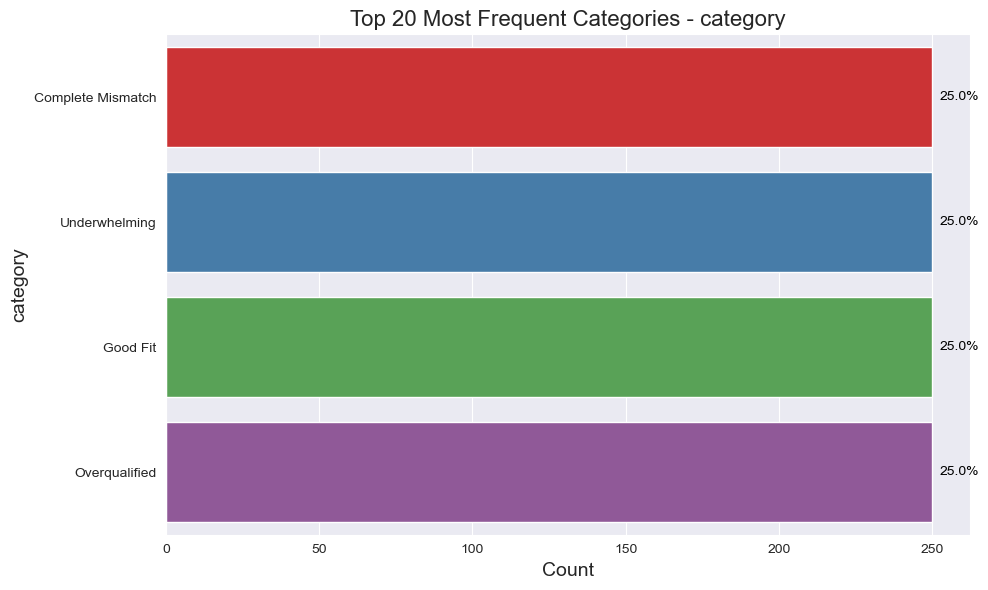

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_73126/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


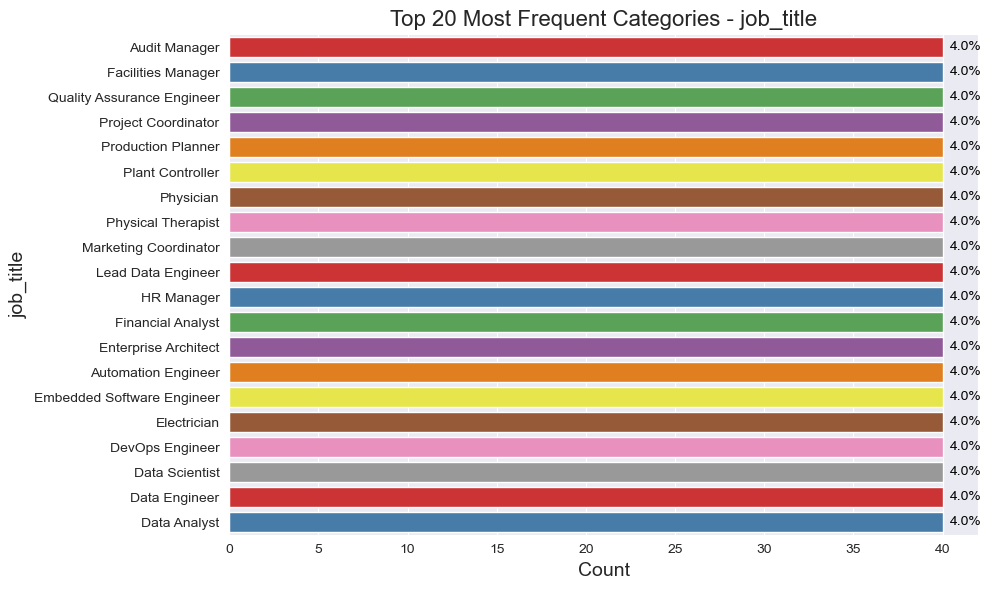

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_73126/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


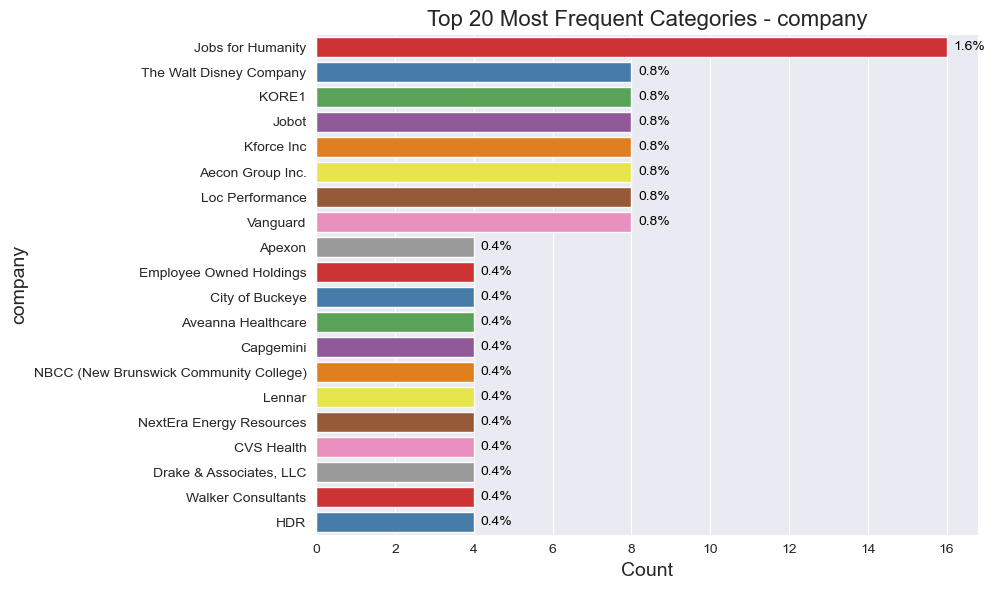

In [19]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [20]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0
2,resume_text,0,0.0


#### Text lengths

In [21]:
temp = df[text_columns+['category']].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,job_skills,job_summary,resume_text,job_skills_len,job_summary_len,resume_text_len
0,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...,404,6142,2071
1,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Christina Padilla DVM**\n\n*Email: christina...,404,6142,2572
2,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Andrew Kirby**\n*+44 00000 000000* *|* *andr...,404,6142,2497
3,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....,404,6142,3232
4,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",**Randy Smith**\n*+1 (123) 456-7890* *|* *rand...,776,5769,2352
...,...,...,...,...,...,...
995,"Quality Control, Technical Operations, Regulat...","Job Type\nFull-time\nDescription\nOn April 28,...",# Todd Coleman\n\n*Phone*: (123) 456-7890 | *E...,327,5481,4064
996,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",**CHRISTOPHER MOODY**\n\n*+1 (555) 555-5555* *...,493,5456,2101
997,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",# Eric Zhang\n\n*Email*: eric.zhang@email.com ...,493,5456,2518
998,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",**SCOTT PATTERSON**\n*Phone*: (123) 456-7890 *...,493,5456,3152


In [22]:
temp["num_of_skills"] = temp["job_skills"].apply(lambda x: len(x.split(",")))

#### Text length statistics

In [23]:
temp[[f"{i}_len" for i in text_columns] + ["num_of_skills"]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,job_skills_len,job_summary_len,resume_text_len,num_of_skills
count,1000.00,1000.00,1000.00,1000.00
mean,546.26,5210.39,2854.54,29.06
std,266.32,964.29,597.77,12.90
min,130.00,2885.00,1738.00,9.00
5%,220.00,3580.00,2101.95,14.00
25%,350.00,4341.00,2410.00,20.00
50%,491.00,5282.00,2731.00,27.00
75%,670.00,5979.00,3166.75,34.00
95%,1051.00,6773.00,4102.25,56.00
max,1514.00,6985.00,4984.00,98.00


#### Text length histograms

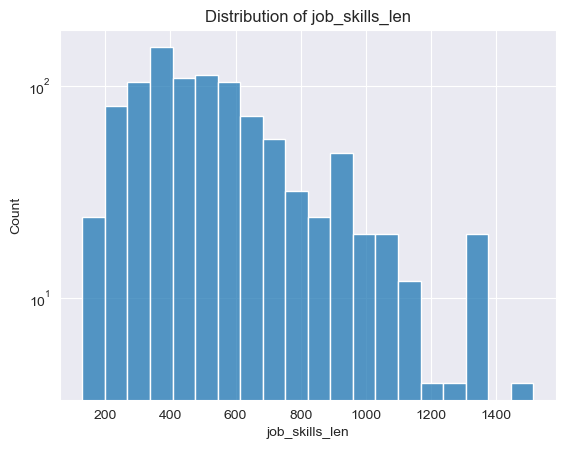

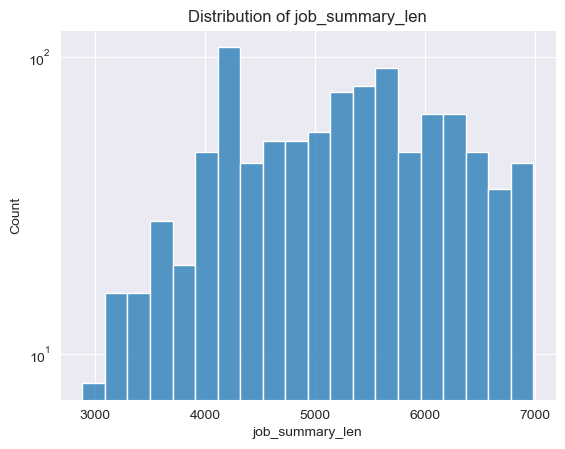

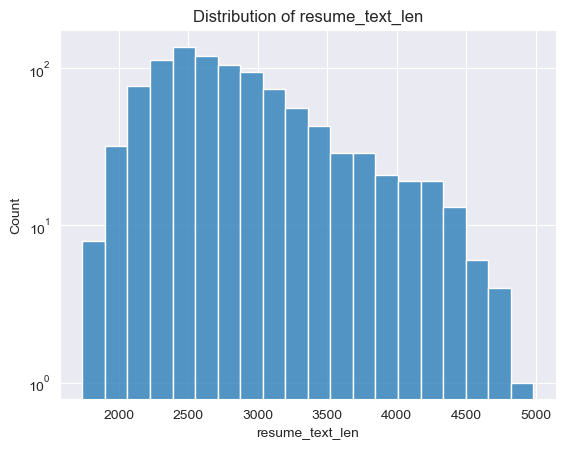

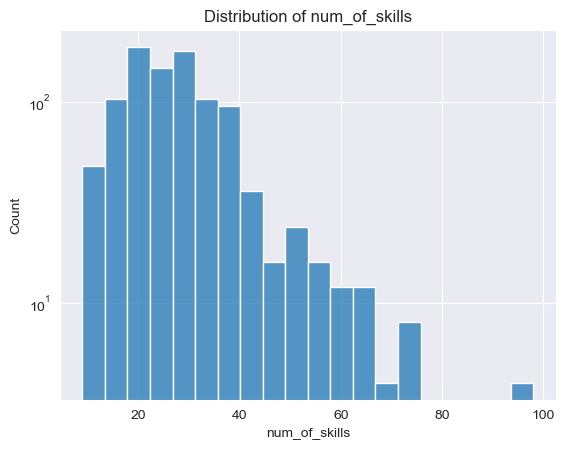

In [24]:
for i in [f"{i}_len" for i in text_columns] + ["num_of_skills"]:
    plot_histogram(temp, i)

## WordClouds

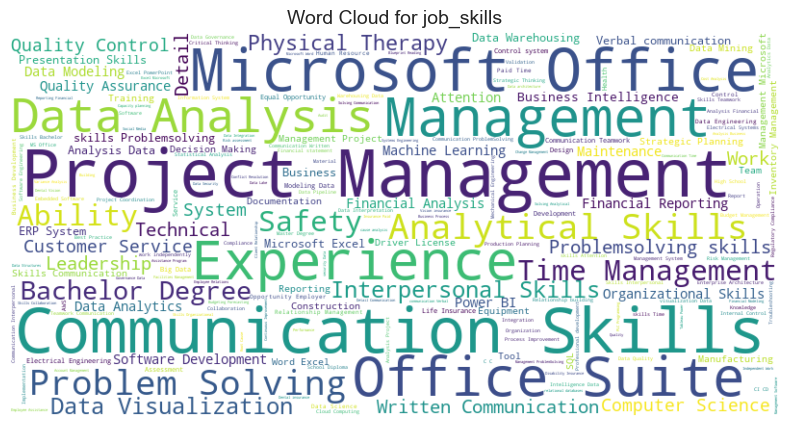

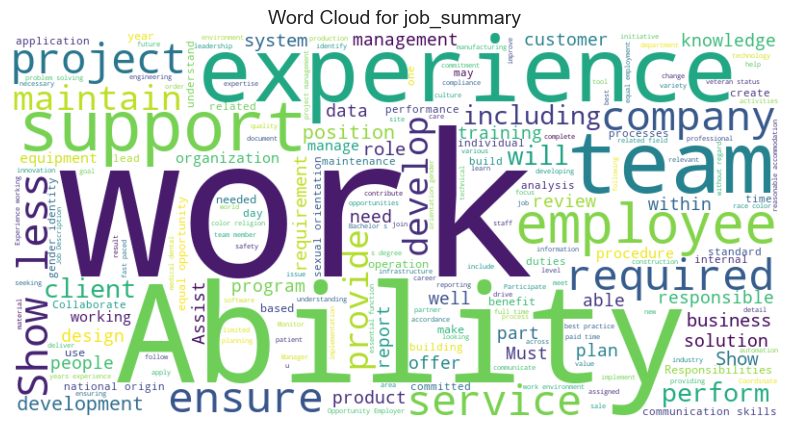

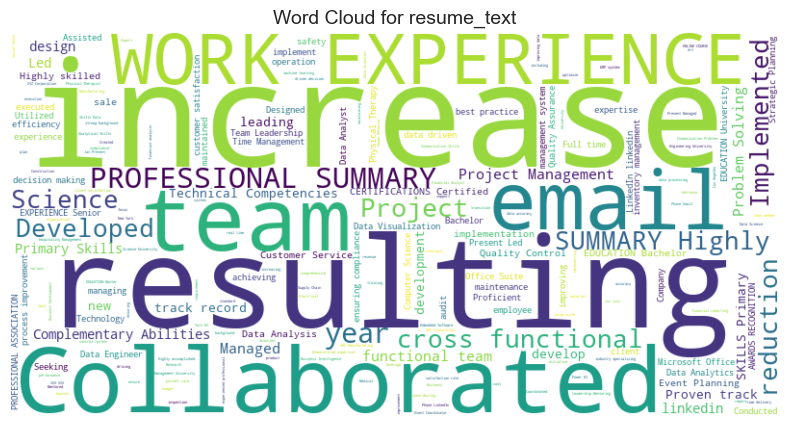

In [25]:
for col in text_columns:
    text_data = " ".join(temp[col])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title(f"Word Cloud for {col}", fontsize=14)
    plt.show()

## Analyzing Resume text

### No professional summary

In [26]:
no_prof_sum = df[~df['resume_text'].str.contains("Summary", case=False)].copy()
print("Number of resumes without professional summary:", no_prof_sum.shape[0])

Number of resumes without professional summary: 5


In [27]:
for i in range(no_prof_sum.shape[0]):
    print("Fit category:", no_prof_sum.iloc[i]['category'])
    print("Resume:\n", no_prof_sum.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 # GARY FRANK

*Washington, DC* *|* *garyfrank@email.com* *|* *202-xxx-xxxx* *|* *linkedin.com/in/gary-frank*

**DATA SCIENTIST**

*Highly skilled Data Scientist with 6+ years of experience in quantitative analysis, data visualization, and project management. Expertise in R, Python, and Tableau. Proven track record of delivering actionable insights and driving strategic decisions in international development and national security sectors.*

**SKILLS**

*Data Science, Statistical Methods, Data Analysis, Tableau, Visualization, R, Python, Programming, Quantitative Analysis, Project Management, Strategic Planning, Problem Solving, Requirements Gathering, Stakeholder Management, Data Management, Data Warehousing, Data Mining, Data Visualization, Decision Making, Communication, Collaboration, Team Work, Flexibility, Adaptability, Innovation, Leadership, Growth, Development, Benefits, Compensation, WorkLife Balance, Training, Tuition Reimbursement, Diversity, I

We can see that the resumes generated look good even though there is no professional summary present (which is a good thing)

### No Skills

In [28]:
print("Number of resumes without skills word:", df[~df['resume_text'].str.contains("Skills", case=False)].shape[0])

Number of resumes without skills word: 0


All resumes have skills word, which is most probably skills section

### No Projects

In [29]:
print("Number of resumes without Projects word:", df[~df['resume_text'].str.contains("Projects", case=False)].shape[0])

no_proj = df[~df['resume_text'].str.contains("Projects", case=False)].copy()
no_proj

Number of resumes without Projects word: 224


,id,job_title,company,job_skills,job_summary,category,resume_text
0,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Complete Mismatch,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...
3,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Overqualified,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
7,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Overqualified,**David King**\n\n*Email: dking@email.com* | *...
14,561971,Audit Manager,Jobot,"Audit, Leadership, Client Relationships, Strat...",Want to learn more about this role and Jobot? ...,Good Fit,**Monica Garza**\n*Phone: (123) 456-7890* | *E...
...,...,...,...,...,...,...,...
979,873700,Quality Control Inspector,Star Pipe Products,"Material Handling Forklift license, Quality co...",Job Description\nSTAR PIPE PRODUCTS\nLocation:...,Overqualified,# Patricia Ramos\n\n*Email: patriciaramos@emai...
984,701017,Quality Control Inspector,GAF,"Quality Control, Technical Support, English Co...","Job Description:\nIntroduction\nAt GAF, we cov...",Complete Mismatch,**CAITLYN WOODS**\n\n*Phone: (123) 456-7890* |...
988,335165,Quality Control Inspector,Nikkiso Clean Energy & Industrial Gases,"QA Inspector, ASME B31.3, Welding, NDT, Inspec...",Nikkiso Clean Energy & Industrial Gases\nis a ...,Complete Mismatch,**ELIZABETH DAVIS**\n\n*Phone: (555) 555-5555*...
996,702092,Quality Control Inspector,FactoryFix,"Quality Control, Inspection, Product Quality, ...","CECO is a fast-paced, diversified global provi...",Complete Mismatch,**CHRISTOPHER MOODY**\n\n*+1 (555) 555-5555* *...


In [30]:
for i in range(10):
    print("Fit category:", no_proj.iloc[i]['category'])
    print("Resume:\n", no_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Complete Mismatch
Resume:
 **Jennifer Oneal**
*+1 (555) 555-5555* *|* *joneal@email.com* *|* *linkedin.com/in/joneal*

**Professional Summary**

Highly skilled professional with 10+ years of experience in the fashion industry, specializing in design, merchandising, and retail management. Proven track record in leading creative teams, driving sales growth, and implementing successful marketing strategies. Seeking to leverage extensive background in a new challenge.

**Skills**

*Primary Skills*: Fashion Design, Merchandising, Retail Management, Team Leadership, Sales Strategy, Marketing Campaigns

*Technical Competencies*: Adobe Creative Suite (Expert), Fashion GPS (Proficient), MS Office (Proficient)

*Complementary Abilities*: Project Management, Cross-Functional Collaboration, Trend Forecasting, Visual Merchandising

**Work Experience**

*Fashion Director, Chic Boutique (2018-Present)*

- Oversaw design and merchandising for 10+ store locations, increasing sales by 15% 

Even though there are no Projects for these resumes, the resume has rich content in other sections (Except for some).

#### No work experience

In [31]:
#Check how many of these dont have any other sections
no_exp_proj = no_proj[~no_proj['resume_text'].str.contains("Work Experience", case=False)].copy()
no_exp_proj

,id,job_title,company,job_skills,job_summary,category,resume_text
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
123,248807,Business Intelligence Analyst,Jobs for Humanity,"Data Analytics, Reporting, PSaS, SQL, Power BI...","Job Description\nMcKesson is an impact-driven,...",Overqualified,"# Jennifer Evans\n\n*New York, NY* *|* *+1 (xx..."
142,248704,Business Intelligence Analyst,The Daily Wire,"Data Analytics, Business Intelligence, Data Vi...",You’re not applying for just another job. Or s...,Good Fit,"**Kathleen Roach**\n*+1 (xxx) xxx-xxx*, *kathl..."
551,1202661,Facilities Manager,JLL,"Facilities Management, Stakeholder Management,...",Objective of Role\nThe Facilities Manager (FM)...,Overqualified,"# KRISTEN MORRIS\n\n*New York, NY* *|* *Linked..."


In [32]:
for i in range(no_exp_proj.shape[0]):
    print("Fit category:", no_exp_proj.iloc[i]['category'])
    print("Resume:\n", no_exp_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 **SHEILA MCMILLAN**

*Los Angeles, CA* *|* *(555) 555-5555* *|* *smcmillan@email.com* *|* *linkedin.com/in/sheila-mcmillan*

**PROFESSIONAL SUMMARY**

Highly skilled Audit Manager with 7+ years of experience in providing financial statement auditing services and assurance services to middle-market clients. Proven track record of leading and supervising teams, delivering exceptional client service, and driving business growth. Expertise in risk assessment, internal controls, and financial statement guidance.

**SKILLS**

*Accounting, Auditing, Assurance services, Financial statement guidance, Business recommendations, Internal controls, Risk assessment, Management, Leadership, Supervision, Client service, Communication, Analytical skills, Project management, Microsoft Suite, Software skills, CPA*

**EXPERIENCE**

**Audit Manager** | *Baker Tilly US, LLP* | *Los Angeles, CA* | *Jan. 2020 - Present*

- Manage all aspects of audit engagements for various ind

### No work experience

In [33]:
no_exp = df[~df['resume_text'].str.contains("Work Experience", case=False)]
no_exp

,id,job_title,company,job_skills,job_summary,category,resume_text
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
123,248807,Business Intelligence Analyst,Jobs for Humanity,"Data Analytics, Reporting, PSaS, SQL, Power BI...","Job Description\nMcKesson is an impact-driven,...",Overqualified,"# Jennifer Evans\n\n*New York, NY* *|* *+1 (xx..."
142,248704,Business Intelligence Analyst,The Daily Wire,"Data Analytics, Business Intelligence, Data Vi...",You’re not applying for just another job. Or s...,Good Fit,"**Kathleen Roach**\n*+1 (xxx) xxx-xxx*, *kathl..."
166,185212,CNC Machinist,JC Ford Company,"CNC Machining, Computer Numerical Control (CNC...",JC Ford - Tennessee is seeking top talent to t...,Good Fit,**Glenn Crosby**\n\n*615-555-1212* *|* *glenn....
354,169186,Data Scientist,"Freedom Technology Solutions Group, LLC","Data Science, Statistical Methods, Data Analys...",Freedom Technology Solutions Group is looking ...,Good Fit,"# GARY FRANK\n\n*Washington, DC* *|* *garyfran..."
482,141162,Enterprise Architect,Noblis,"Systems Engineering, Technical Analysis, Strat...",Responsibilities\nThe FAA’s System Engineering...,Good Fit,**DONNA BURNETT**\n*+1 (555) 555-5555* *|* *do...
494,740701,Enterprise Architect,"Northrim Bank, Member FDIC","Cisco Certified Network professional (CCNP), C...","At Northrim Bank, our vision is to be Alaska’s...",Good Fit,"# Nathan Henry\n\n*Anchorage, AK* *|* *nathanh..."
551,1202661,Facilities Manager,JLL,"Facilities Management, Stakeholder Management,...",Objective of Role\nThe Facilities Manager (FM)...,Overqualified,"# KRISTEN MORRIS\n\n*New York, NY* *|* *Linked..."
630,1166956,HR Manager,Alta Equipment Company,"Microsoft Office, Outlook, HRIS, Internet, Zoo...",Come work for the largest equipment dealer in ...,Good Fit,**Brian Lucas**\n*+1 (123) 456-7890* *|* *bria...
701,690309,Marketing Coordinator,Walker Consultants,"Marketing, Communications, Story telling, Micr...",Title: Marketing Coordinator\nLocation: Denver...,Underwhelming,"**Joseph Sanford**\n*Denver, CO | (xxx) xxx-xx..."


In [34]:
for i in range(no_exp.shape[0]):
    print("Fit category:", no_exp.iloc[i]['category'])
    print("Resume:\n", no_exp.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 **SHEILA MCMILLAN**

*Los Angeles, CA* *|* *(555) 555-5555* *|* *smcmillan@email.com* *|* *linkedin.com/in/sheila-mcmillan*

**PROFESSIONAL SUMMARY**

Highly skilled Audit Manager with 7+ years of experience in providing financial statement auditing services and assurance services to middle-market clients. Proven track record of leading and supervising teams, delivering exceptional client service, and driving business growth. Expertise in risk assessment, internal controls, and financial statement guidance.

**SKILLS**

*Accounting, Auditing, Assurance services, Financial statement guidance, Business recommendations, Internal controls, Risk assessment, Management, Leadership, Supervision, Client service, Communication, Analytical skills, Project management, Microsoft Suite, Software skills, CPA*

**EXPERIENCE**

**Audit Manager** | *Baker Tilly US, LLP* | *Los Angeles, CA* | *Jan. 2020 - Present*

- Manage all aspects of audit engagements for various ind

Work experience has other alternative names as Professional experience and Experience.
Any resume without work experience or project experience can be re-labelled as a bad fit.
We can also change the resume prompt template for the next set of generations to include another constraint.

## Resume Fit categories

For Complete Mismatch:


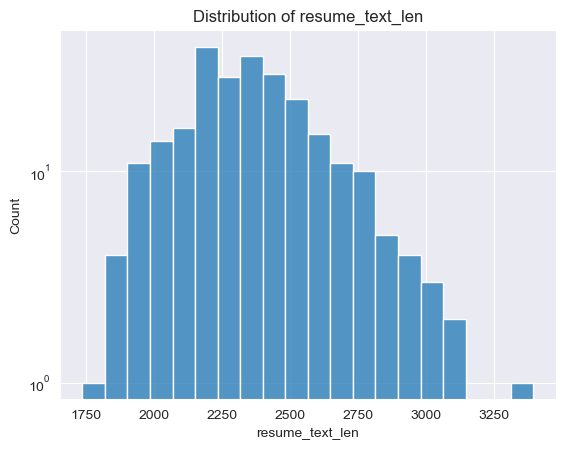

For Underwhelming:


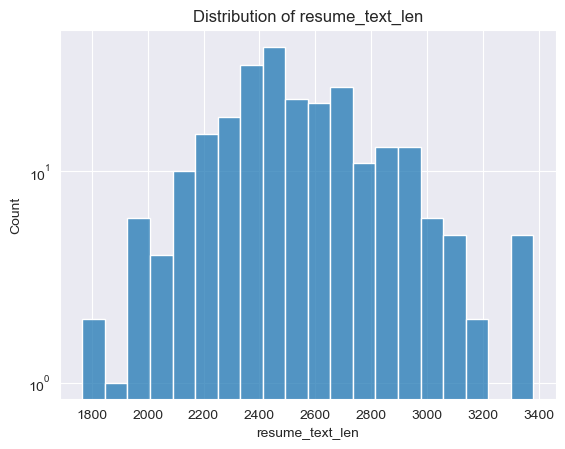

For Good Fit:


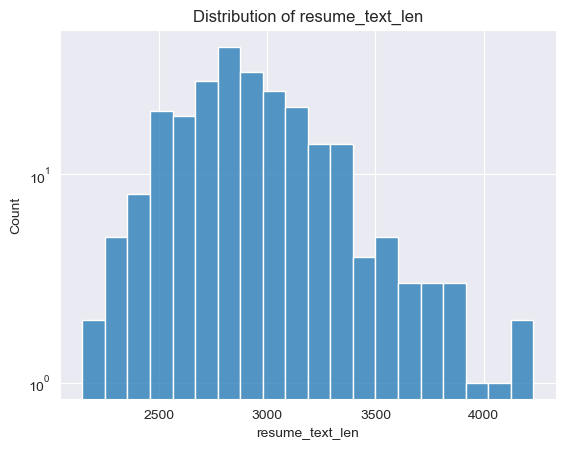

For Overqualified:


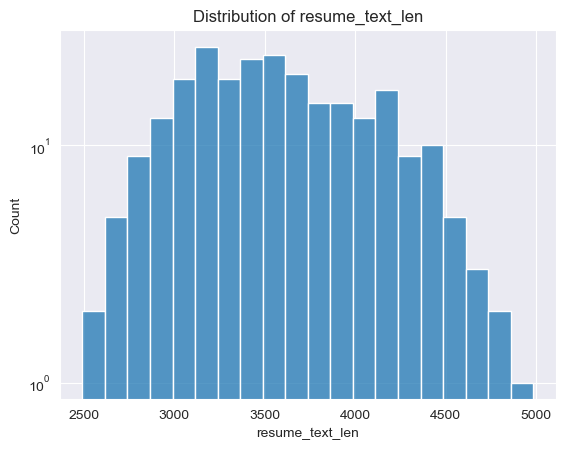

In [35]:
for i in df['category'].unique():
    print(f"For {i}:")
    plot_histogram(temp[temp['category'] == i], 'resume_text_len')